<a href="https://colab.research.google.com/github/EngAmirEskandari/SmartWrist/blob/master/Stock_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libarary adding

In [ ]:
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Getting Data

In [ ]:
df = web.DataReader('BTC-USD', data_source='yahoo', start = '2012-01-01', end = '2021-02-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,1.014672e+11,46196.464844
2021-02-09,48003.722656,45166.960938,46184.992188,46481.105469,9.180985e+10,46481.105469
2021-02-10,47145.566406,43881.152344,46469.761719,44918.183594,8.730109e+10,44918.183594


Visualize the closing price history

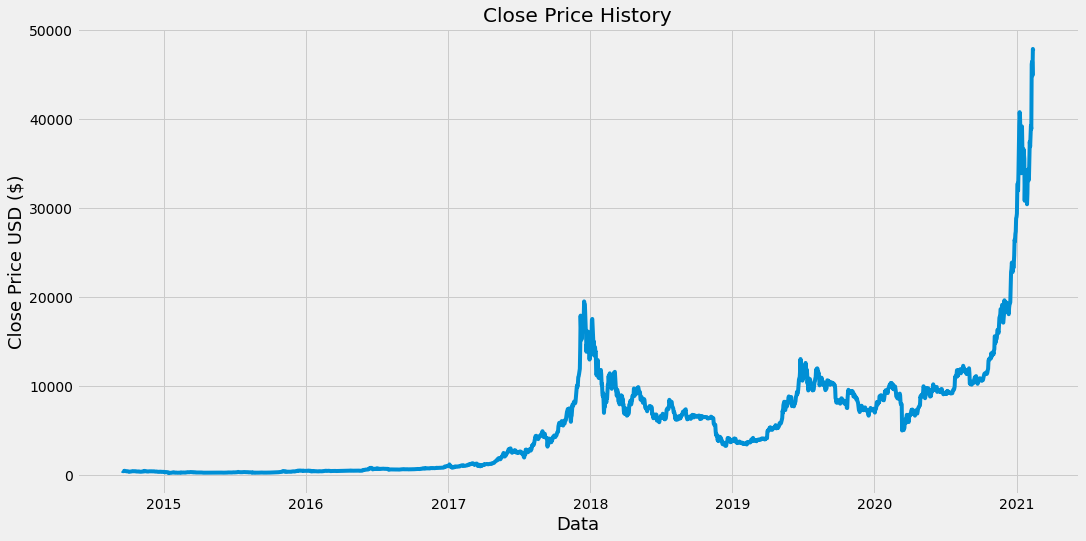

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()

Data just with close column

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .95)
training_data_len

2221

Scale Data

In [ ]:
scaler = MinMaxScaler (feature_range=(0,1))
slaced_data = scaler.fit_transform(dataset) 

slaced_data

array([[0.00585007],
       [0.00516092],
       [0.00453986],
       ...,
       [0.93733351],
       [1.        ],
       [0.99613207]])

Create training data set
Creat the scaled trianing data set


In [ ]:
train_data = slaced_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

Conver the x_train and y_train to numpy arrays

In [ ]:
x_train , y_train = np.array(x_train), np.array(y_train)

Reshape for LSTM

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2161, 60, 1)

Build the LSTM model


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

compile the model

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')


Trian THE model

In [ ]:
model.fit(x_train, y_train, batch_size=32,epochs=100)

Epoch 1/100
68/68 [==============================] - 7s 52ms/step - loss: 0.0024
Epoch 2/100
68/68 [==============================] - 4s 54ms/step - loss: 2.0041e-04
Epoch 3/100
68/68 [==============================] - 4s 58ms/step - loss: 1.8440e-04
Epoch 4/100
68/68 [==============================] - 5s 66ms/step - loss: 1.6508e-04
Epoch 5/100
68/68 [==============================] - 5s 66ms/step - loss: 1.7964e-04
Epoch 6/100
68/68 [==============================] - 4s 62ms/step - loss: 1.1035e-04
Epoch 7/100
68/68 [==============================] - 4s 59ms/step - loss: 1.3945e-04
Epoch 8/100
68/68 [==============================] - 4s 54ms/step - loss: 9.7325e-05
Epoch 9/100
68/68 [==============================] - 4s 58ms/step - loss: 1.1179e-04
Epoch 10/100
68/68 [==============================] - 4s 55ms/step - loss: 8.6674e-05
Epoch 11/100
68/68 [==============================] - 4s 60ms/step - loss: 1.0290e-04
Epoch 12/100
68/68 [==============================] - 5s 65ms/step 

Create testing data set

In [ ]:
test_data = slaced_data[training_data_len:, :]
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:
## I made i
test_data = slaced_data[training_data_len:training_data_len+60, :]
x_test = []
y_test = dataset[training_data_len: ,:]
actually_predict = np.zeros(60)
x_test = np.reshape(test_data,(1,60,1))
for i in range(60):
  a = model.predict(x_test)
  actually_predict[i] = scaler.inverse_transform(a)
  for j in range(59):
    x_test[0][j][0] = x_test[0][j+1][0]
    x_test[0][59][0] = a


In [ ]:
actually_predict

array([21913.69335938, 20866.37890625, 19892.48632812, 19011.2109375 ,
       18189.09179688, 17417.08789062, 16686.56640625, 15994.68164062,
       15340.03125   , 14722.06835938, 14140.21484375, 13593.63769531,
       13081.15820312, 12601.31738281, 12152.453125  , 11732.79101562,
       11340.52148438, 10973.85253906, 10631.0546875 , 10310.47949219,
       10010.57519531,  9729.89453125,  9467.08984375,  9220.91601562,
        8990.21972656,  8773.93261719,  8571.06933594,  8380.71679688,
        8202.03515625,  8034.23632812,  7876.59814453,  7728.44482422,
        7589.14990234,  7458.13378906,  7334.85595703,  7218.81152344,
        7109.53417969,  7006.58642578,  6909.56201172,  6818.08154297,
        6731.79492188,  6650.37304688,  6573.51025391,  6500.92333984,
        6432.34521484,  6367.53076172,  6306.24707031,  6248.28173828,
        6193.43066406,  6141.51074219,  6092.34619141,  6045.77197266,
        6001.63916016,  5959.80419922,  5920.13378906,  5882.50488281,
      

In [ ]:
y_test

array([[11916.33496094],
       [12823.68945312],
       [12965.89160156],
       [12931.5390625 ],
       [13108.0625    ],
       [13031.17382812],
       [13075.24804688],
       [13654.21875   ],
       [13271.28515625],
       [13437.8828125 ],
       [13546.52246094],
       [13780.99511719],
       [13737.109375  ],
       [13550.48925781],
       [13950.30078125],
       [14133.70703125],
       [15579.84863281],
       [15565.88085938],
       [14833.75390625],
       [15479.56738281],
       [15332.31542969],
       [15290.90234375],
       [15701.33984375],
       [16276.34375   ],
       [16317.80859375],
       [16068.13867188],
       [15955.58789062],
       [16716.11132812],
       [17645.40625   ],
       [17804.00585938],
       [17817.08984375],
       [18621.31445312],
       [18642.23242188],
       [18370.00195312],
       [18364.12109375],
       [19107.46484375],
       [18732.12109375],
       [17150.62304688],
       [17108.40234375],
       [17717.4140625 ],


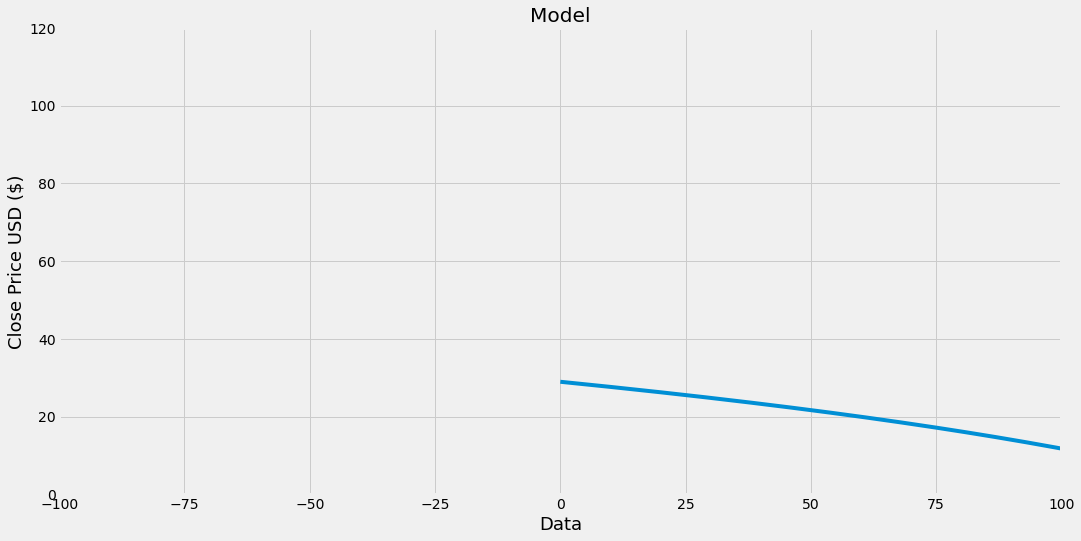

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(actually_predict)
plt.xlim((-100,100))
plt.ylim((0,120))
#plt.plot(valid[['Close', 'Predictions']])
#plt.legend(['Train','Val','Predict'],loc ='lpwer right' )
plt.show()

In [ ]:
test_data_1 = slaced_data[training_data_len - 60:training_data_len , :]
x_test = []
y_test = dataset[training_data_len: ,:]
x_test.append(test_data_1[:,0])

for i in range(60, len(test_data)):
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


Convert data to numpy array

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


Get pridected value

In [ ]:

predi = model.predict(x_test)
predi = scaler.inverse_transform(predi)



RMSE ERROE

In [ ]:
rmse=np.sqrt(np.mean(((predi- y_test)**2)))
rmse

42.83664080963128

plot the data

Visualizing data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lpwer right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


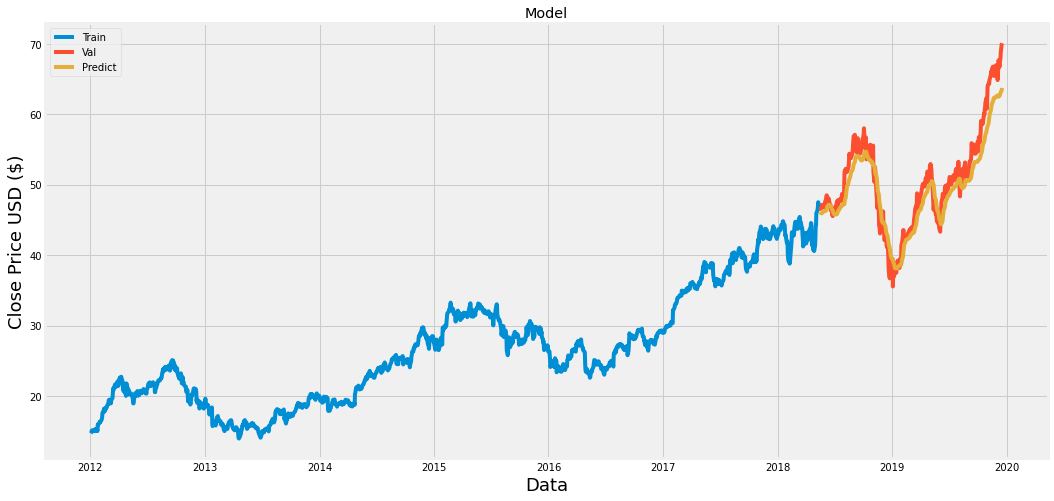

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predict'],loc ='lpwer right' )
plt.show()

Show the valid and predicted prices

In [ ]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,48.754795
2018-05-18,46.577499,48.797386
2018-05-21,46.907501,48.767117
2018-05-22,46.790001,48.747505
2018-05-23,47.090000,48.717533
...,...,...
2019-12-11,67.692497,69.168716
2019-12-12,67.864998,69.423004
2019-12-13,68.787498,69.694427


In [ ]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2019-12-17')

new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_predic = model.predict(X_test)

pred_predic = scaler.inverse_transform(pred_predic)
print(pred_predic)

[[71.146805]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start = '2019-12-18', end = '2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
